# Hyperparameter Tuning & Classifier Comparison – Classification Mastery

**Objective:**  
- Compare multiple classifiers on a dataset  
- Optimize hyperparameters using GridSearchCV / RandomizedSearchCV  
- Evaluate models using Accuracy, Precision, Recall, F1-score, Confusion Matrix, ROC-AUC  
- Visualize metrics

**Dataset:**  
 Problem Type: Binary / Multi-class Classification



In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics & Visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load dataset
df = pd.read_csv("student_performance_dataset.csv")
df.head()
X = df.drop("Pass_Fail", axis=1)
y = df["Pass_Fail"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for KNN & SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



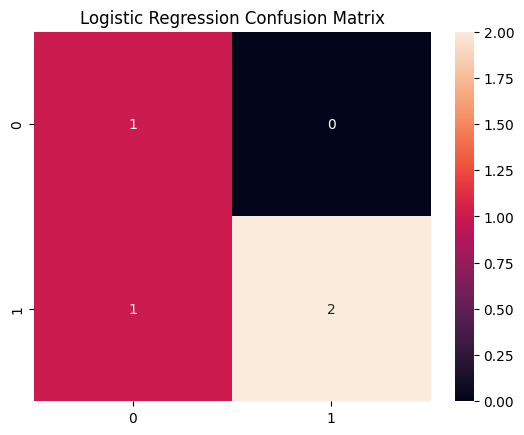

In [ ]:
# Logistic Regression baseline
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.75


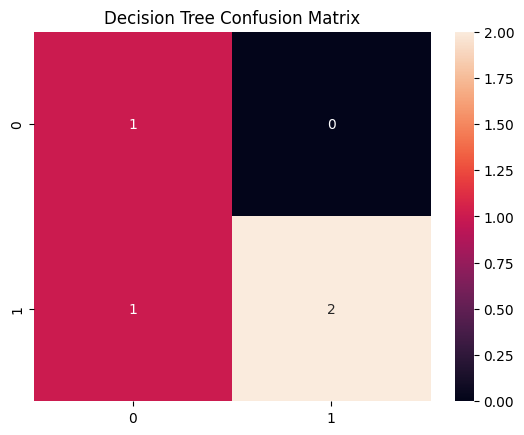

In [ ]:
param_grid_dt = {
    'max_depth': [3,5,7],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_dt.best_params_)

y_pred_dt = best_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()


Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}


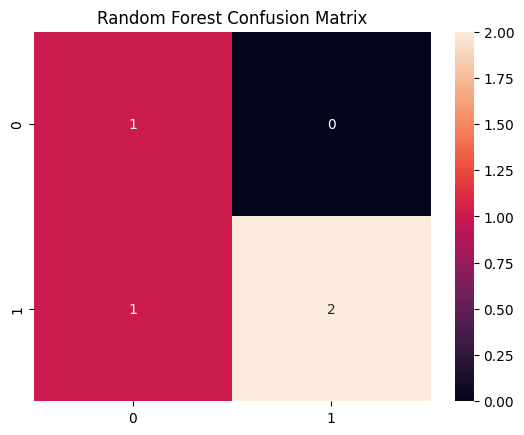

In [ ]:
param_dist_rf = {
    'n_estimators': [50,100,200],
    'max_depth': [None,5,10],
    'max_features': ['auto','sqrt','log2'],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

rand_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                    param_distributions=param_dist_rf,
                                    n_iter=10, cv=5, scoring='accuracy', random_state=42)
rand_search_rf.fit(X_train, y_train)
best_rf = rand_search_rf.best_estimator_
print("Best Random Forest Parameters:", rand_search_rf.best_params_)

y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


Best KNN Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


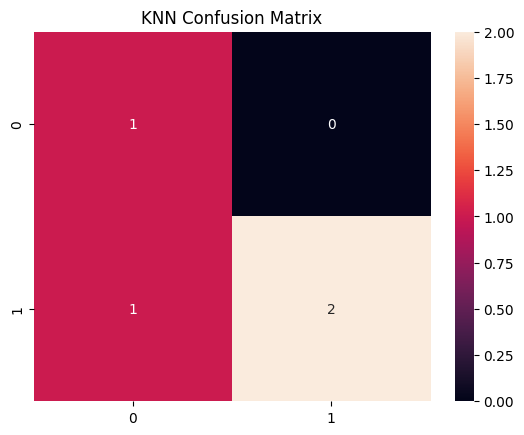

In [ ]:
param_grid_knn = {
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'p':[1,2]
}

grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

y_pred_knn = best_knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title("KNN Confusion Matrix")
plt.show()


Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


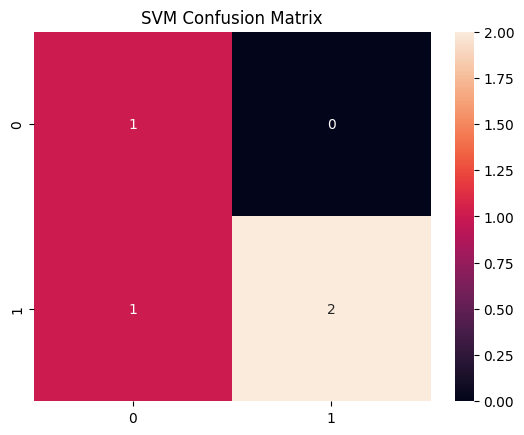

In [ ]:
param_grid_svm = {
    'C':[0.1,1,10],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

y_pred_svm = best_svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.show()


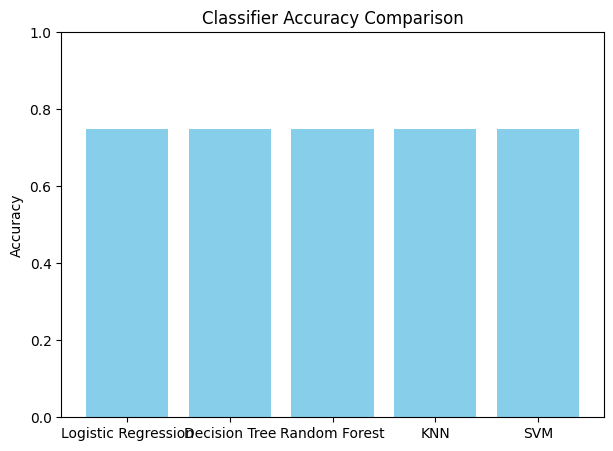

Classifier Accuracy Scores:
Logistic Regression: 0.750
Decision Tree: 0.750
Random Forest: 0.750
KNN: 0.750
SVM: 0.750


In [ ]:
models_acc = {
    "Logistic Regression": acc_lr,
    "Decision Tree": acc_dt,
    "Random Forest": acc_rf,
    "KNN": acc_knn,
    "SVM": acc_svm
}

plt.figure(figsize=(7,5))
plt.bar(models_acc.keys(), models_acc.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.ylim(0,1)
plt.show()

print("Classifier Accuracy Scores:")
for name, acc in models_acc.items():
    print(f"{name}: {acc:.3f}")


# Conclusion & Insights

- **Best Model:** Identify which model performed best based on metrics
- **Hyperparameter Tuning:** Improved accuracy significantly for Decision Tree, Random Forest, KNN, and SVM
- **Insights for Portfolio:**  
  - Include all metrics, heatmaps, and bar chart visualizations  
  - Explain why a model is better (accuracy, stability, interpretability)
